<a href="https://colab.research.google.com/github/vinalyan/Data-Science/blob/master/GeekBrains/algorithms/web7/Lession7_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задание №1
К алгоритму `kNN`, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

## Реализация алгоритма kNN из лекции

In [2]:
#Евклидова метрика расстояния
def e_metrics(x1, x2):
      
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [11]:
#Алгоритм поиска ближайших
def knn(x_train, y_train, x_test, k, q = 0.25):
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}

        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        #----------ВОТ ТУТ Я ДОБАВИЛ--------

        for d in sorted(test_distances)[0:k]:
            if q != 0: #это нужно для того, что бы при 0**0 = 0, по базе питон считает, что 0**0 = 1
              classes[d[1]] += q**d[0] 
       # print(classes)
       # print(sorted(test_distances)[0:k])
       # print(sorted(classes, key=classes.get)[-1])
       # print('--------')
        #----------ВОТ ТУТ ЗАКОНЧИЛ-----------

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [12]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

## Подготовка данных

In [13]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [19]:
#0**0

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

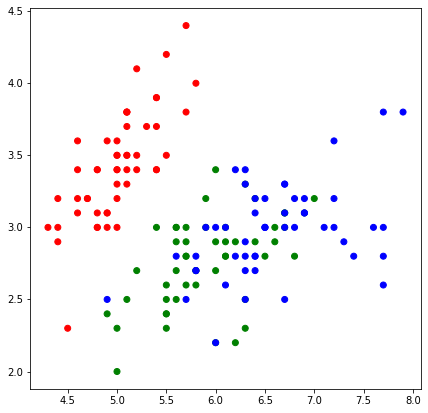

In [16]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

## Проверка


In [17]:
k = 10
q = 0
y_pred = knn(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.333


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
(58800, 2)


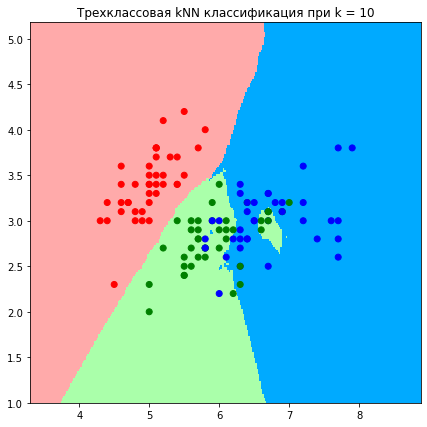

In [18]:
%time
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()
get_graph(X_train, y_train, k)